<a href="https://colab.research.google.com/github/diegovrosales/SP1_Laboratorios/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

5

In [31]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['0','1','2','3','4','5','6','7','8','9']


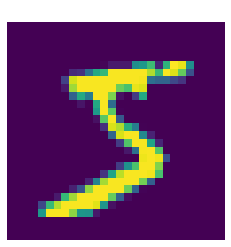

In [34]:
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.axis('off')
plt.show()

In [35]:
train_images = (train_images-np.mean(train_images)) / np.std(train_images)
train_images = tf.squeeze(train_images / 255.0)

test_images = (test_images-np.mean(test_images)) / np.std(test_images)
test_images = tf.squeeze(test_images / 255.0)

train_images.shape, test_images.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

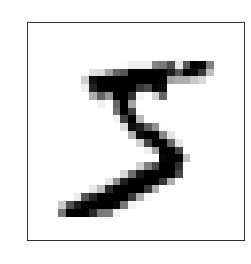

In [37]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.show()

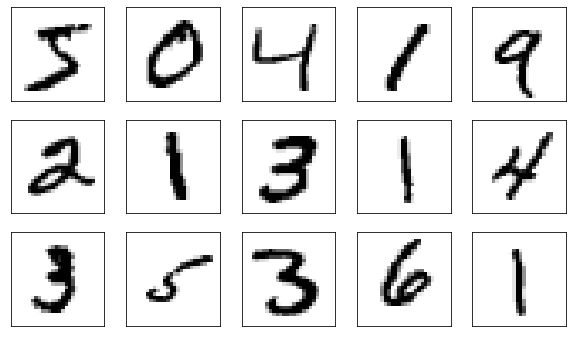

In [39]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='w')
plt.show()

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=5
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 38s 911us/sample - loss: 1.7382 - accuracy: 0.5299 - val_loss: 1.6483 - val_accuracy: 0.5617
Epoch 2/5
42000/42000 [==============================] - 38s 904us/sample - loss: 1.5609 - accuracy: 0.5736 - val_loss: 1.4734 - val_accuracy: 0.6183
Epoch 3/5
42000/42000 [==============================] - 36s 853us/sample - loss: 1.3931 - accuracy: 0.6104 - val_loss: 1.3092 - val_accuracy: 0.6479
Epoch 4/5
42000/42000 [==============================] - 33s 794us/sample - loss: 1.2479 - accuracy: 0.6415 - val_loss: 1.1874 - val_accuracy: 0.6451
Epoch 5/5
42000/42000 [==============================] - 35s 824us/sample - loss: 1.1273 - accuracy: 0.6682 - val_loss: 1.0598 - val_accuracy: 0.6915


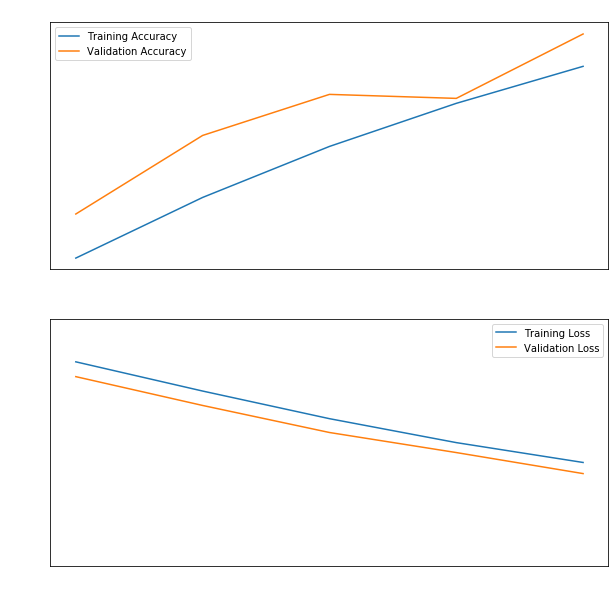

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.7])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [52]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 1.0549105516433717
Accuracy: 0.6919
